<a href="https://colab.research.google.com/github/rachanabramhane/assignment/blob/main/census_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [ ]:
cens = pd.read_csv('/content/drive/MyDrive/census_project')

In [ ]:
cens = pd.read_csv(('/content/drive/MyDrive/census_project'), names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', \
                                      'marital_status', 'occupation', 'relationship', 'race', 'sex', \
                                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

In [ ]:
cens.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
cens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Total number of records
n_records = cens.shape[0]

# Total number of features
n_features = cens.shape[1]

# Number of records where individual's income is more than $50,000
n_greater_50k = cens[cens['income'] == ' <=50K'].shape[0]

# Number of records where individual's income is at most $50,000
n_at_most_50k = cens[cens['income'] == ' >50K'].shape[0]

# Percentage of individuals whose income is more than $50,000
greater_percent =  (n_greater_50k / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Total number of features: {}".format(n_features))
print("Individuals making more than $50k: {}".format(n_greater_50k))
print("Individuals making at most $50k: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50k: {:.2f}%".format(greater_percent))

Total number of records: 32561
Total number of features: 15
Individuals making more than $50k: 24720
Individuals making at most $50k: 7841
Percentage of individuals making more than $50k: 75.92%


In [ ]:
# drop uneeded columns
cens.drop('education', inplace=True, axis=1)
cens.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income']

In [ ]:
# check for nulls
cens.isna().sum()

age               0
workclass         0
fnlwgt            0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [ ]:
# check duplicates and remove it
print("Before removing duplicates:", cens.duplicated().sum())

cens = cens[~cens.duplicated()]

print("After removing duplicates:", cens.duplicated().sum())

Before removing duplicates: 24
After removing duplicates: 0


In [ ]:
# before discarding
cens.sex.value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

In [ ]:
# discard spaces from entries
columns = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
for column in columns:
    cens[column] = cens[column].str.strip()

In [ ]:
# after discarding
cens.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [ ]:
# before changing "?"
cens.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# changing "?" to Unknown
change_columns = ['workclass', 'occupation', 'native_country']
for column in change_columns:
        cens[column] = cens[column].replace({'?': 'Unknown'})

In [ ]:
# after changing "?"
cens.workclass.value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

**Data** **Exploration**

In [ ]:
# a quick look on some statistics about the data
cens.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


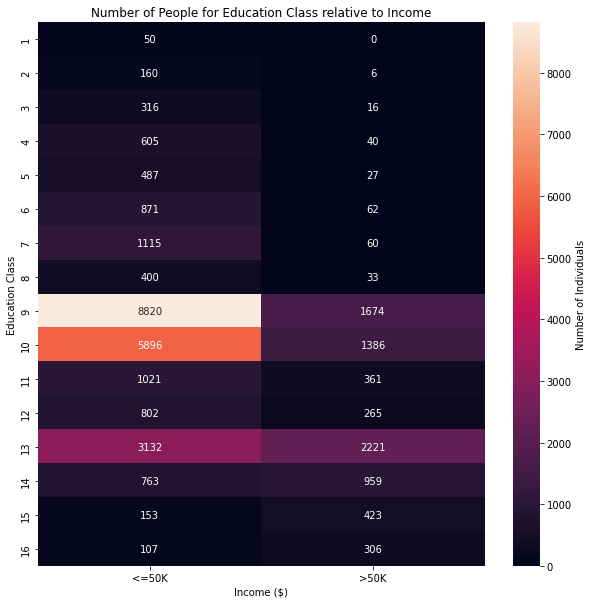

In [ ]:
# Heat map
plt.figure(figsize=[10,10])
 
ct_counts = cens.groupby(['education_num', 'income']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'education_num', columns = 'income', values = 'count').fillna(0)

sb.heatmap(ct_counts, annot = True, fmt = '.0f', cbar_kws = {'label' : 'Number of Individuals'})
plt.title('Number of People for Education Class relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Education Class');

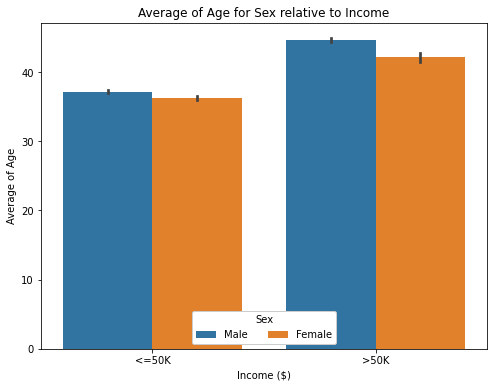

In [ ]:
# Clustered Bar Chart 
plt.figure(figsize=[8,6])
ax = sb.barplot(data = cens, x = 'income', y = 'age', hue = 'sex')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Sex')
plt.title('Average of Age for Sex relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Age');

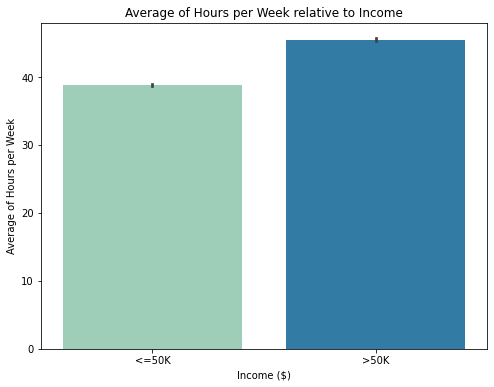

In [ ]:
# Bar Chart 
plt.figure(figsize=[8,6])
sb.barplot(data=cens, x='income', y='hours_per_week', palette='YlGnBu')
plt.title('Average of Hours per Week relative to Income')
plt.xlabel('Income ($)')
plt.ylabel('Average of Hours per Week');

**Data Preprocessing**

In [ ]:
cens_prep = cens.copy()

In [ ]:
# Scalling
from sklearn.preprocessing import MinMaxScaler
numerical = ['age', 'capital_gain', 'capital_loss', 'hours_per_week', 'fnlwgt']

scaler = MinMaxScaler()
cens_prep[numerical] = scaler.fit_transform(cens_prep[numerical])

In [ ]:
cens_prep.sample(3)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
19064,0.191781,Private,0.066307,4,Separated,Craft-repair,Not-in-family,White,Female,0.0,0.0,0.397959,United-States,<=50K
22640,0.273973,Private,0.222986,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,0.500000,United-States,>50K
30800,0.328767,Local-gov,0.110163,9,Separated,Other-service,Unmarried,Black,Female,0.0,0.0,0.397959,United-States,<=50K


In [ ]:
# Encoding
cens_prep['sex'] = cens_prep.sex.replace({"Female": 0, "Male": 1})
cens_prep['income'] = cens_prep.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
cens_prep = pd.get_dummies(cens_prep)

In [ ]:
encoded = list(cens_prep.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

92 total features after one-hot encoding.


In [ ]:
# import some classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

# import needed functions
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Partioning the data
X = cens_prep.drop('income', axis=1)
y = cens_prep['income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Partioning the data
X = cens_prep.drop('income', axis=1)
y = cens_prep['income']

# Splitting to training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = {}

# models with default parameter
models['LogisticRegression'] = LogisticRegression()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()

In [ ]:
# Cross validation
for model_name in models:
    model = models[model_name]
    results = cross_validate(model, X, y, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
    
    print(model_name + ":")
    print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
    print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())
    print("---------------------------------------------------------")

LogisticRegression:
Accuracy: train:  0.8503165904951875 | test:  0.8493102222947646
F1-score: train:  0.6568091863110362 | test:  0.6550981518427458
---------------------------------------------------------
RandomForest:
Accuracy: train:  0.9999615824939017 | test:  0.8569630134027098
F1-score: train:  0.9999202691707912 | test:  0.6768122676021339
---------------------------------------------------------
AdaBoost:
Accuracy: train:  0.8611580838636395 | test:  0.8600981412008759
F1-score: train:  0.6814059967293329 | test:  0.6784156320753815
---------------------------------------------------------


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.999979755548245 | test:  0.936391800297773
F1-score: train:  0.9999797563166327 | test:  0.9393567229905511


Conclusions
Features Importance 

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cens_conc = cens.copy()

In [ ]:
for col in cens_conc.columns:
    if cens_conc[col].dtypes == 'object':
        encoder = LabelEncoder()
        cens_conc[col] = encoder.fit_transform(cens_conc[col])

In [ ]:
# Partioning the data
Xc = cens_conc.drop('income', axis=1)
yc = cens_conc['income']

# Splitting to training and testing
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

In [ ]:
clf = RandomForestClassifier()
clf.fit(Xc_train, yc_train)


# View a list of the features and their importance scores
print('\nFeatures Importance:')
feat_imp = pd.DataFrame(zip(Xc.columns.tolist(), clf.feature_importances_ * 100), columns=['feature', 'importance'])
feat_imp


Features Importance:


,feature,importance
0,age,14.861960
1,workclass,4.011172
2,fnlwgt,16.932719
3,education_num,12.198093
4,marital_status,7.343541
5,occupation,6.709834
6,relationship,10.312850
7,race,1.392481
8,sex,1.111412
9,capital_gain,11.319058


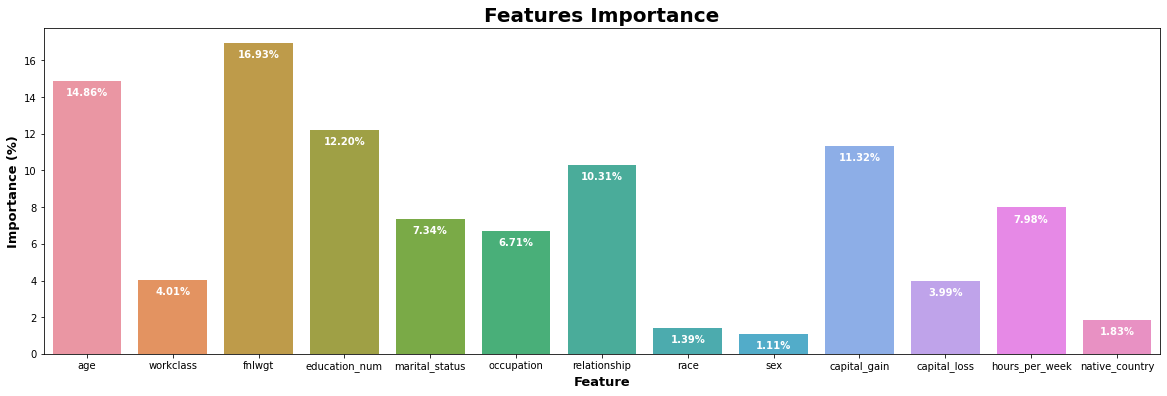

In [ ]:
# Features importance plot
plt.figure(figsize=[20,6])
sb.barplot(data=feat_imp, x='feature', y='importance')
plt.title('Features Importance', weight='bold', fontsize=20)
plt.xlabel('Feature', weight='bold', fontsize=13)
plt.ylabel('Importance (%)', weight='bold', fontsize=13);


# add annotations
impo = feat_imp['importance']
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = impo[loc]
    pct_string = '{:0.2f}%'.format(count)

    plt.text(loc, count-0.8, pct_string, ha = 'center', color = 'w', weight='bold')

In [ ]:
cens_final = cens.copy()


In [ ]:
cens_final.drop(['race', 'sex', 'capital_loss', 'native_country'], axis=1, inplace=True)

In [ ]:
# Scalling
numerical = ['age', 'capital_gain', 'hours_per_week', 'fnlwgt']
scaler = MinMaxScaler()
cens_final[numerical] = scaler.fit_transform(cens_final[numerical])

# Encoding
cens_final['income'] = cens_final.income.replace({"<=50K": 0, ">50K": 1})

# Create dummy variables
cens_final = pd.get_dummies(cens_final)

# Partioning
Xf = cens_final.drop('income', axis=1)
yf = cens_final['income']

# Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(Xf, yf)

In [ ]:
clf = RandomForestClassifier()

results = cross_validate(clf, X_resampled, y_resampled, cv=5, scoring=['accuracy', 'f1'], return_train_score=True)
print("Accuracy:" , 'train: ', results['train_accuracy'].mean(), '| test: ', results['test_accuracy'].mean())
print("F1-score:" , 'train: ', results['train_f1'].mean(), '| test: ', results['test_f1'].mean())

Accuracy: train:  0.9999544498554739 | test:  0.9317354852008902
F1-score: train:  0.9999544517764104 | test:  0.9351847175862034
